# Part 0. Get to know your data

# 1. Importing libraries and Data

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
azdias = pd.read_csv('Udacity_AZDIAS_052018.csv', sep=';')
customers = pd.read_csv('Udacity_CUSTOMERS_052018.csv', sep=';')
customers=customers.drop(['PRODUCT_GROUP','CUSTOMER_GROUP','ONLINE_PURCHASE'],axis=1)

/Users/maitreytalware/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# As per error need to check this columns for incosistency, handled in data preprocessing step
azdias.columns[18:20]

Index(['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'], dtype='object')

### Top 3 rows of azdias and customer

In [4]:
print("shape of azdias dataset",azdias.shape)
azdias.head(3)

shape of azdias dataset (891221, 366)


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3


In [5]:
print("shape of customers dataset",customers.shape)
customers.head(3)

shape of customers dataset (191652, 366)


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,3.0,5.0,3.0,2.0,6.0,9.0,7.0,3,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,3.0,0.0,9.0,NaN,3,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,4.0,10.0,13.0,11.0,6.0,9.0,2.0,3,2,4


# 2. Exploratory Data Analysis

## 2.1 Descriptive Statistics

In [6]:
azdias.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,8.912210e+05,891221.000000,817722.000000,817722.000000,81058.000000,29499.000000,6170.000000,1205.000000,628274.000000,798073.000000,...,770025.000000,815304.000000,815304.000000,815304.000000,783619.000000,817722.000000,798073.000000,891221.000000,891221.000000,891221.000000
mean,6.372630e+05,-0.358435,4.421928,10.864126,11.745392,13.402658,14.476013,15.089627,13.700717,8.287263,...,2.417322,6.001214,7.532130,5.945972,3.933406,7.908791,4.052836,3.362438,1.522098,2.777398
std,2.572735e+05,1.198724,3.638805,7.639683,4.097660,3.243300,2.712427,2.452932,5.079849,15.628087,...,1.166572,2.856091,3.247789,2.771464,1.964701,1.923137,1.949539,1.352704,0.499512,1.068775
min,1.916530e+05,-1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,7.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.144580e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,14.000000,11.000000,1.000000,...,2.000000,3.000000,5.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,6.372630e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,4.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,8.600680e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,9.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,1.082873e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,595.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


In [7]:
customers.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,191652.000000,191652.000000,145056.000000,145056.000000,11766.000000,5100.000000,1275.000000,236.000000,139810.000000,141725.000000,...,137392.000000,143781.000000,143781.000000,143781.000000,137910.000000,145056.000000,141725.000000,191652.000000,191652.000000,191652.000000
mean,95826.500000,0.344359,1.747525,11.352009,12.337243,13.672353,14.647059,15.377119,10.331579,4.965863,...,2.429508,4.374417,4.564769,3.168868,4.152716,8.646371,3.723133,2.576806,1.376432,3.060907
std,55325.311233,1.391672,1.966334,6.275026,4.006050,3.243335,2.753787,2.307653,4.134828,14.309694,...,1.148821,2.924355,2.887035,2.233516,1.974375,1.154001,2.095540,1.168486,0.484492,1.086254
min,1.000000,-1.000000,1.000000,0.000000,2.000000,2.000000,5.000000,8.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,47913.750000,-1.000000,1.000000,8.000000,9.000000,11.000000,13.000000,14.000000,9.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,9.000000,2.000000,1.000000,1.000000,3.000000
50%,95826.500000,0.000000,1.000000,11.000000,13.000000,14.000000,15.000000,16.000000,10.000000,1.000000,...,2.000000,4.000000,4.000000,3.000000,5.000000,9.000000,3.000000,3.000000,1.000000,3.000000
75%,143739.250000,2.000000,1.000000,16.000000,16.000000,16.000000,17.000000,17.000000,13.000000,4.000000,...,3.000000,7.000000,7.000000,4.000000,6.000000,9.000000,5.000000,3.000000,2.000000,4.000000
max,191652.000000,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,523.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


## 2.2 Missing Values

#### Earlier we can saw a lot of columns with NaN values. Let explore more about the missing values

In [8]:
# creating a dataframe to get count/percentage of missing values in azdias and customers
azdias_nan=pd.DataFrame(azdias.isna().sum(axis=0)).reset_index()
azdias_nan.columns=['column','azdias_nan']
azdias_nan['azdiaz_nan_percent']=(azdias_nan['azdias_nan']/len(azdias))*100

customers_nan=pd.DataFrame(customers.isna().sum(axis=0)).reset_index()
customers_nan.columns=['column','customers_nan']
customers_nan['customer_nan_percent']=(customers_nan['customers_nan']/len(customers))*100
missing_values=pd.merge(azdias_nan, customers_nan, on='column')
missing_values=missing_values.sort_values(by=['azdias_nan','customers_nan'],ascending=[False,False])
missing_values

,column,azdias_nan,azdiaz_nan_percent,customers_nan,customer_nan_percent
7,ALTER_KIND4,890016,99.864792,191416,99.876860
6,ALTER_KIND3,885051,99.307691,190377,99.334732
5,ALTER_KIND2,861722,96.690047,186552,97.338927
4,ALTER_KIND1,810163,90.904837,179886,93.860748
100,EXTSEL992,654153,73.399639,85283,44.498883
...,...,...,...,...,...
346,SHOPPER_TYP,0,0.000000,0,0.000000
354,VERS_TYP,0,0.000000,0,0.000000
363,ZABEOTYP,0,0.000000,0,0.000000
364,ANREDE_KZ,0,0.000000,0,0.000000


#### Ploting group barchart

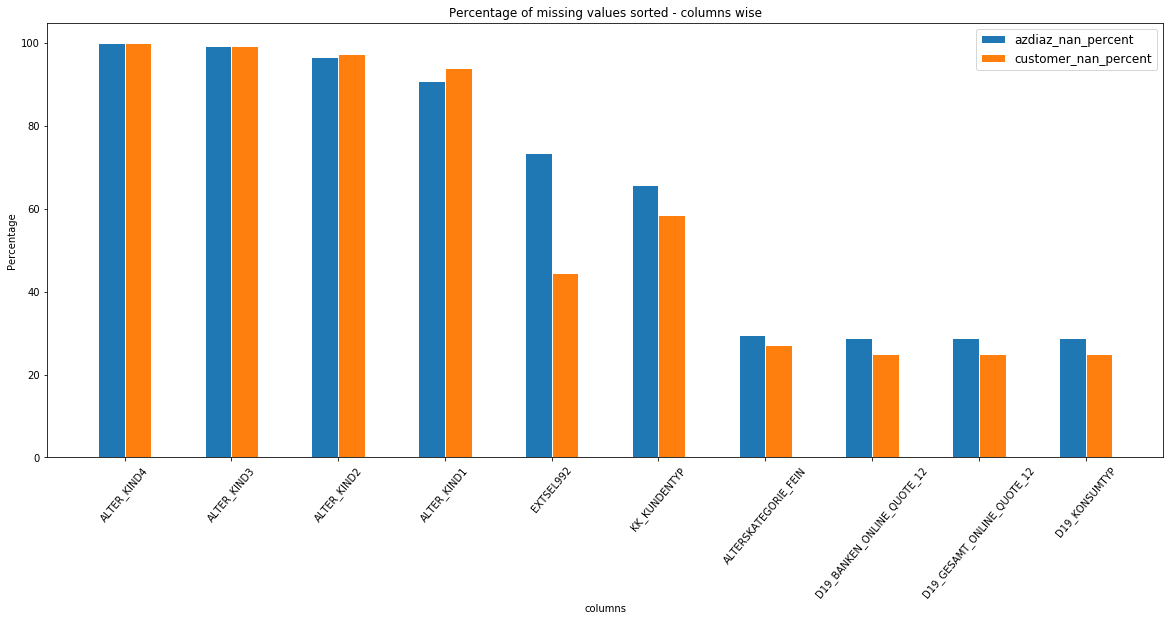

In [9]:
plt.figure(figsize=(20,8))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = missing_values['azdiaz_nan_percent'][:10]
bars2 = missing_values['customer_nan_percent'][:10]
label=missing_values['column'][:10]
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white')
plt.bar(r2, bars2, width=barWidth, edgecolor='white')

 
# Add xticks on the middle of the group bars
plt.xlabel('columns')
plt.ylabel('Percentage')
plt.xticks([r + barWidth/2 for r in range(len(bars1))], label,rotation=50)
 
# Create legend & Show graphic
plt.title('Percentage of missing values sorted - columns wise')
plt.legend(['azdiaz_nan_percent','customer_nan_percent'],prop={'size': 12})
plt.show()


##### we see that these columns have more than 90 % of missing data

In [10]:
# we will drop these columns, creating a variable to do so
drop_cols=list(label[:4])
drop_cols

['ALTER_KIND4', 'ALTER_KIND3', 'ALTER_KIND2', 'ALTER_KIND1']

In [11]:
row_na=pd.DataFrame(azdias.isna().sum(axis=1))
row_na.columns=['na_count']
row_na['percent_information_retained']=((azdias.shape[1]-row_na['na_count'])/azdias.shape[1])*100
row_na

,na_count,percent_information_retained
0,252,31.147541
1,15,95.901639
2,5,98.633880
3,7,98.087432
4,5,98.633880
...,...,...
891216,11,96.994536
891217,6,98.360656
891218,8,97.814208
891219,4,98.907104


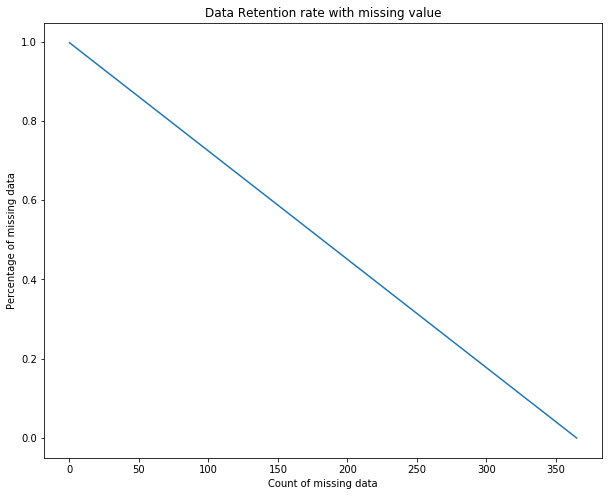

In [12]:
a=np.arange(0,azdias.shape[1])
b=a/azdias.shape[1]
plt.figure(figsize=(10,8))
plt.plot(a,b[::-1])
plt.xlabel('Count of missing data')
plt.ylabel('Percentage of missing data')
plt.title('Data Retention rate with missing value')
plt.show()

**if a row has 20 missing values it retains 94.26% of data**

In [13]:
b[::-1][20]

0.9426229508196722

#### Distribution of Information retained data

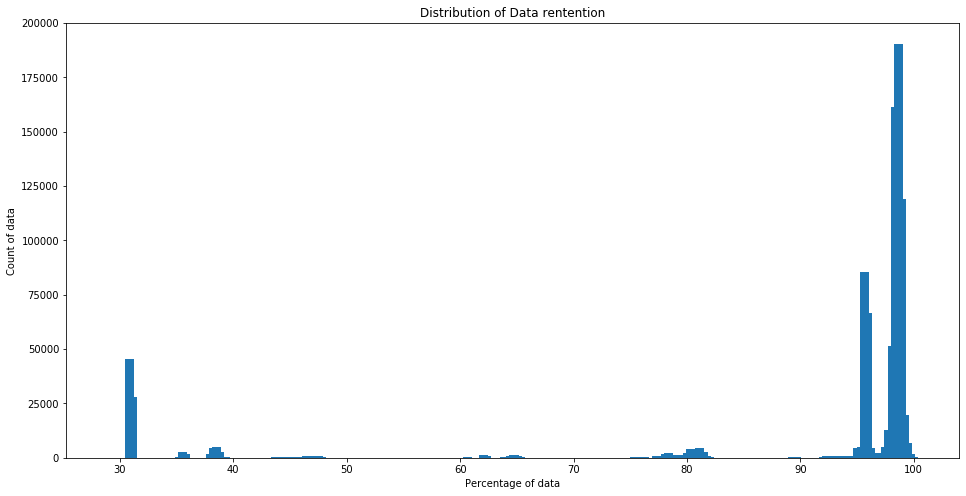

In [14]:
plt.figure(figsize=(16,8))
row_na_distribution=row_na.groupby(['percent_information_retained']).count()
plt.bar(row_na_distribution.index,row_na_distribution.na_count)
plt.xlabel('Percentage of data')
plt.ylabel('Count of data')
plt.title('Distribution of Data rentention')
plt.show()

**Observation :** *We can see that majority of samples retains more that 90%*

# 3. Data Preprocessing

## 3.0 Making data consistent
1. Uniforming Numeric Data type from float and int to only int as in documentation
2. Next we need to check if data present in dataset is as per DIAS Attribute values

### 3.0.1 Uniforming Numeric Data type from float and int to only int as in documentation

In [15]:
# Getting all numeric columns and categorical columns
Numeric_columns=azdias.select_dtypes(include=np.number).columns.tolist()
categorical_col=set(azdias.columns).difference(set(Numeric_columns))
print("Length of Numeric columns",len(Numeric_columns))
print("Length of categorical columns",len(categorical_col))
print("Categorial columns are",categorical_col)

Length of Numeric columns 360
Length of categorical columns 6
Categorial columns are {'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CAMEO_INTL_2015', 'OST_WEST_KZ', 'EINGEFUEGT_AM', 'D19_LETZTER_KAUF_BRANCHE'}


In [16]:
# azdias[Numeric_columns] = azdias[Numeric_columns].astype('Int64')
# customers[Numeric_columns] = customers[Numeric_columns].astype('Int64')
azdias[Numeric_columns] = azdias[Numeric_columns].apply(pd.to_numeric)
customers[Numeric_columns] = customers[Numeric_columns].apply(pd.to_numeric)

In [17]:
print("Azdias\n",azdias.dtypes.head())
print("\t")
print("Customers\n",customers.dtypes.head())

Azdias
 LNR              int64
AGER_TYP         int64
AKT_DAT_KL     float64
ALTER_HH       float64
ALTER_KIND1    float64
dtype: object
	
Customers
 LNR              int64
AGER_TYP         int64
AKT_DAT_KL     float64
ALTER_HH       float64
ALTER_KIND1    float64
dtype: object


### 3.0.2 Next we need to check if data present in dataset is as per DIAS Attribute values

In [18]:
# reading the DIAS Attributes
dias_df=pd.read_excel('DIAS Attributes - Values 2017.xlsx',skiprows=1,usecols=['Attribute','Description','Value','Meaning'])
dias_df=dias_df.fillna(method='ffill')
dias_df.head(6)

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,best-ager typology,0,no classification possible
2,AGER_TYP,best-ager typology,1,passive elderly
3,AGER_TYP,best-ager typology,2,cultural elderly
4,AGER_TYP,best-ager typology,3,experience-driven elderly
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown


#### 3.0.2.a Numeric Data check

In [19]:
# Checking numeric columns first - so taking intersection of common columns
Attribute=set(azdias.columns).intersection(dias_df.Attribute).intersection(Numeric_columns)

In [20]:
inconsistent=[]
def consistency_check():
    '''
    Input:.. 
    Output:..
    Function: 
        For each attribute checks which values are allowed according to DIAS documentation.
        This way we can find out if any attribute has values other than mentioned
    Returns:
        List of columns we need to check before continuing
    '''
    for i in Attribute: 
        #print("starting computation for",i)
        try:
            con=list(dias_df[dias_df['Attribute']==i]['Value'])
            for m in con:
                if type(m)==str:
                    con.remove(m)
                    con=con+list(map(int, m.split(',')))
                else:
                    pass

            if len(set(azdias[i].dropna().unique()).difference(set(con)))==0:
                # contains data as per documentation
                #print("passsed",i)
                pass
            else:
                print('--------- Failed ---------')
                print(i,set(azdias[i].dropna().unique()).difference(set(con)))
                inconsistent.append(i)
        except:
            inconsistent.append(i)
    return inconsistent
consistency_check()

--------- Failed ---------
ORTSGR_KLS9 {0.0}
--------- Failed ---------
LP_LEBENSPHASE_FEIN {0.0}
--------- Failed ---------
KBA05_MODTEMP {6.0}
--------- Failed ---------
LP_FAMILIE_GROB {0.0}
--------- Failed ---------
LP_FAMILIE_FEIN {0.0}
--------- Failed ---------
LP_LEBENSPHASE_GROB {0.0}


['ANZ_HH_TITEL',
 'ORTSGR_KLS9',
 'LP_LEBENSPHASE_FEIN',
 'MIN_GEBAEUDEJAHR',
 'KBA13_ANZAHL_PKW',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'ANZ_HAUSHALTE_AKTIV',
 'KBA05_MODTEMP',
 'LP_FAMILIE_GROB',
 'LP_FAMILIE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'GEBURTSJAHR']

**NOTE**:  Upon checking above columns with the documentaion we have found that these values should not be in the column.
I believe that {0} and {6} have been added to dataset value for that column is unknown. So, we will moving forward with this consideration in mind


#### 3.0.2.b Categorical data check

In [21]:
# Now lets check the categorical columns
category={}
def consistency_check_cat():
    for i in categorical_col:
        category[i]=azdias[i].dropna().unique()
    return category
consistency_check_cat()

{'CAMEO_DEUG_2015': array([8.0, 4.0, 2.0, 6.0, 1.0, 9.0, 5.0, 7.0, 3.0, '4', '3', '7', '2',
        '8', '9', '6', '5', '1', 'X'], dtype=object),
 'CAMEO_DEU_2015': array(['8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D', '5C',
        '8B', '7A', '5D', '9E', '9B', '1B', '3D', '4E', '4B', '3C', '5A',
        '7B', '9A', '6D', '6E', '2C', '7C', '9C', '7D', '5E', '1D', '8D',
        '6C', '6A', '5B', '4D', '3A', '2B', '7E', '3B', '6F', '5F', '1C',
        'XX'], dtype=object),
 'CAMEO_INTL_2015': array([51.0, 24.0, 12.0, 43.0, 54.0, 22.0, 14.0, 13.0, 15.0, 33.0, 41.0,
        34.0, 55.0, 25.0, 23.0, 31.0, 52.0, 35.0, 45.0, 44.0, 32.0, '22',
        '24', '41', '12', '54', '51', '44', '35', '23', '25', '14', '34',
        '52', '55', '31', '32', '15', '13', '43', '33', '45', 'XX'],
       dtype=object),
 'OST_WEST_KZ': array(['W', 'O'], dtype=object),
 'EINGEFUEGT_AM': array(['1992-02-10 00:00:00', '1992-02-12 00:00:00',
        '1997-04-21 00:00:00', ..., '2010-12-02 00:00:00',

**NOTE :** - Upon checking with documentation, 
- EINGEFUEGT_AM - drop for now as when one hot coding will create lot of columns
- D19_LETZTER_KAUF_BRANCHE - is refering to other columns will drop for now as when one hot coding will create lot of columns
- CAMEO_DEUG_2015 should not have 'X', we need to replace with 0 as unknown
- CAMEO_INTL_2015 should not have 'XX, we need to replace with 0 as unknown
- CAMEO_DEU_2015 should not have 'XX', we need to replace with 0 as unknown

In [22]:
azdias=azdias.drop('D19_LETZTER_KAUF_BRANCHE',axis=1)
customers=customers.drop('D19_LETZTER_KAUF_BRANCHE',axis=1)

azdias=azdias.drop('EINGEFUEGT_AM',axis=1)
customers=customers.drop('EINGEFUEGT_AM',axis=1)

In [23]:
azdias[['CAMEO_DEUG_2015','CAMEO_INTL_2015','CAMEO_DEU_2015']]=azdias[['CAMEO_DEUG_2015','CAMEO_INTL_2015','CAMEO_DEU_2015']].replace(['X','XX'],-1)
azdias[['CAMEO_DEUG_2015','CAMEO_INTL_2015']]=azdias[['CAMEO_DEUG_2015','CAMEO_INTL_2015']].apply(pd.to_numeric)

customers[['CAMEO_DEUG_2015','CAMEO_INTL_2015','CAMEO_DEU_2015']]=customers[['CAMEO_DEUG_2015','CAMEO_INTL_2015','CAMEO_DEU_2015']].replace(['X','XX'],-1)
customers[['CAMEO_DEUG_2015','CAMEO_INTL_2015']]=customers[['CAMEO_DEUG_2015','CAMEO_INTL_2015']].apply(pd.to_numeric)


## 3.1 Data uniformity

*Also having 0,-1 both to represent unknown can cause ambiguity. We should work on this issue by replacing 0 with -1 in the column*

#### Unknown is represented as (-1,0) or (-1,9) in the dataset. 
*Also having 0,-1 both to represent unknown can cause ambiguity. We should work on this issue by replacing 0 with -1 in the column*

- We should have only one either of [-1 or 0] in a column to have consistency.
- We should have only one either of [-1 or 9] in a column to have consistency. 

Handling this condition

In [24]:
ambiguity_10=list(set(list(dias_df[dias_df['Value']=='-1, 0']['Attribute'])).intersection(set(azdias.columns)))
ambiguity_90=list(set(list(dias_df[dias_df['Value']=='-1, 9']['Attribute'])).intersection(set(azdias.columns)))

In [25]:
azdias[ambiguity_10]=azdias[ambiguity_10].replace(0,-1)
azdias[ambiguity_90]=azdias[ambiguity_90].replace(9,-1)

customers[ambiguity_10]=customers[ambiguity_10].replace(0,-1)
customers[ambiguity_90]=customers[ambiguity_90].replace(9,-1)


## 3.2 Handling Missing values

### 3.2.1 Droping data where more than 95% of data missing

#### Rows

In [26]:
# removing rows having retension percentage less than 94%
new_azdias=azdias[azdias.isnull().sum(axis=1)<=20]

new_customers=customers[customers.isnull().sum(axis=1)<=20]

#### Columns

In [27]:
#droping columns which have more than 90 % of missing data
#drop_cols=missing_values['column'][:4]
new_azdias=new_azdias.drop(drop_cols,axis=1)

new_customers=customers.drop(drop_cols,axis=1)

In [28]:
print("shape of azdias dataset before is",azdias.shape)
print("shape of customers dataset before is",customers.shape)
print("\n")
print("shape of azdias dataset after is",new_azdias.shape)
print("shape of customers dataset after is",new_customers.shape)

shape of azdias dataset before is (891221, 364)
shape of customers dataset before is (191652, 364)


shape of azdias dataset after is (745305, 360)
shape of customers dataset after is (191652, 360)


### 3.2.2 Replacing Nan 
 **NOTE** :DIAS Attributes tells us about the attributes. It has 0,-1 representatins for unknown. But,Nan does not mean unknown.
NaN could have been caused due many factors: like human error etc

So we will not fillna() to replace with -1 yet.

##### ToDo : To experiment and check how using fillna to replace nan chnages effciency

How to handle missing values:
- Replace with mode : Viable solution in our situation
- Replace with mean : filling with mean will introduce decimals into dataset, can effect efficiency 
- Replace with ffill : Not viable solution
- Replace with bfill : Not viable solution
- etc.


In [29]:
new_azdias=new_azdias.fillna(new_azdias.mode().iloc[0])
new_customers=new_customers.fillna(new_customers.mode().iloc[0])

In [30]:
new_azdias.isna().sum().sum()

0

In [31]:
new_customers.isna().sum().sum()

0

### 3.2.3 One hot encoding categorical columns

In [35]:
new_customers.dtypes.unique()
new_customers.select_dtypes(include ='O').columns

Index(['CAMEO_DEU_2015', 'OST_WEST_KZ'], dtype='object')

In [36]:
new_azdias=pd.get_dummies(new_azdias)
new_customers=pd.get_dummies(new_customers)


In [40]:
print("new shape of azdias after one hot encoding",new_azdias.shape)
print("new shape of customers after one hot encoding",new_customers.shape)

new shape of azdias after one hot encoding (745305, 405)
new shape of customers after one hot encoding (191652, 405)
